In [1]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
from scipy.integrate import quad

In [2]:
from openpyxl import load_workbook

wb = load_workbook("RAOs SPAR WAMIT.xlsx")
ws = wb.active

In [3]:
periodo = []; freq = []; Surge = []; Heave = []; Pitch = []

for i in range(4, 30):
    periodo.append(ws[f'B{i}'].value)
    Surge.append(ws[f'C{i}'].value)
    Heave.append(ws[f'D{i}'].value)
    Pitch.append((ws[f'E{i}'].value)*180/np.pi)

periodo, Surge, Heave, Pitch = np.array(periodo), np.array(Surge), np.array(Heave), np.array(Pitch)
freq = 2*np.pi/periodo

In [4]:
t, D, T_B, A, T, M, nabla, I_55, k_yy, GM_y, k, w, rho, nu, g, lambda_, D, U, h, z, ka, Re, KC, beta, C_D, C_M, u_0, u_0_dot = symbols(r't, D, T_B, A, T, M, \nabla, I_55, k_yy, GM_y, k, \omega, \rho, \nu, g, \lambda, D, U, h, z, ka, Re, KC, \beta, C_D, C_M, u_0, \dot{u_0}')

var_dictionary = {
    g : 9.81,       # m/s^2
    nu : 1.2E-6,    # m^2/s
    rho : 1025,     # kg/m^3
    D : 10,         # m
    T : 10,         # s
    A : 1.0,        # m
    T_B : 30,       # m
    GM_y : 1.0,     # m
    z : 0,          # m     z_min = 0 ; z_max : -T_B
}

# valor w
var_dictionary[w] = 2*pi/T

# valor k
var_dictionary[k] = w**2/g

# valor lambda
var_dictionary[lambda_] = 2*pi/k

# valor da velocidade U
var_dictionary[U] = A*w*exp(k*z)

# Valor nabla
var_dictionary[nabla] = pi*D**2*T_B/4

### Validade para uso da fórmula de Morison

In [5]:
# a) Regime de ondas longas / Estrutura Esbelta
esb = D/lambda_  # << 1
esb = esb.subs(var_dictionary)
esb = esb.subs(var_dictionary)
esb = esb.subs(var_dictionary)
print(D/lambda_, '=', esb.evalf())

D/\lambda = 0.0640487798897002


In [6]:
# Calculo de ka
ka = (pi*D/lambda_)
ka = ka.subs(var_dictionary)
ka = ka.subs(var_dictionary)
ka = ka.subs(var_dictionary)
print('ka =', ka.evalf())

ka = 0.201215176372872


### Validade do modelo de escoamento potencial

In [7]:
# Re >> 1
Re = U*D/nu
Re = Re.subs(var_dictionary)
Re = Re.subs(var_dictionary)
print('Re =', Re.evalf())

Re = 5235987.75598299


In [8]:
# KC minimo
KC = U*T/D
KC = KC.subs(var_dictionary)
KC = KC.subs(var_dictionary)
print('KC_min =', KC.evalf())

KC_min = 0.628318530717959


In [9]:
# KC maximo
KC = U*T*(exp(k*(-T_B)))/D
KC = KC.subs(var_dictionary)
KC = KC.subs(var_dictionary)
KC = KC.subs(var_dictionary)
print('KC_max = ', KC.evalf())

KC_max =  0.187871119686180


### a) Cálculo da força pela fórmula de Morison

Suponha que, sobre esta estrutura, incida uma onda regular de amplitude $A=1$ m e período $T=10$ s e que se propaga no sentido $x+$. Nesta situação, verifique que é razoável considerar o regime de ondas longas, aproximando os efeitos de espalhamento de ondas sobre a estrutura. Empregue, então, a fórmula de Morison para obter uma estimativa da força hidrodinâmica horizontal que age sobre o corpo. Considere o coeficiente de arrasto das seções circulares $C_D=1.0$. Desconsidere efeitos não-lineares na parcela inercial da força. O potencial de velocidades do escoamento associado a esta onda é dado por:

$$\Phi (x,z,t) = \dfrac{gA}{\omega}e^{kz} \sin (kx - \omega t)$$

In [10]:
# Calculo de Beta
beta = Re/KC
beta.evalf()

27870104.5947306

In [11]:
# Escolha de C_M e C_D
var_dictionary[C_M] = 2.0   # Circulo
var_dictionary[C_D] = 1.0   # Baixos KCs e altos betas

In [12]:
# Calculo das velocidades e aceleracoes
z_v = Symbol('z_v')
u_0 = w*A*exp(k*z_v)*cos(w*t) # válido para kA << 1
u_0_dot = diff(u_0, t)

In [13]:
u_0

A*\omega*exp(k*z_v)*cos(\omega*t)

In [14]:
u_0_dot

-A*\omega**2*exp(k*z_v)*sin(\omega*t)

In [15]:
f_x_in = -rho*pi*(D**2)*C_M*u_0_dot/4
f_x_in = f_x_in.subs(var_dictionary)
f_x_in = f_x_in.subs(var_dictionary)
f_x_in = f_x_in.subs(var_dictionary)
f_x_in

2050.0*pi**3*exp(0.00407747196738022*pi**2*z_v)*sin(pi*t/5)

In [16]:
f_x_dr = 0.5*(rho*D*C_D*u_0**2)
f_x_dr = f_x_dr.subs(var_dictionary)
f_x_dr = f_x_dr.subs(var_dictionary)
f_x_dr = f_x_dr.subs(var_dictionary)
f_x_dr

205.0*pi**2*exp(0.00815494393476045*pi**2*z_v)*cos(pi*t/5)**2

In [17]:
F_x_in = integrate(f_x_in,(z_v,0,-T_B))
F_x_in = F_x_in.subs(var_dictionary)
F_x_in.evalf()

-1107202.20744432*sin(pi*t/5)

In [18]:
F_x_dr = integrate(f_x_dr,(z_v,0,-T_B))
F_x_dr = F_x_dr.subs(var_dictionary)
F_x_dr = F_x_dr.subs(var_dictionary)
F_x_dr.evalf()

-22890.6586803248*cos(pi*t/5)**2

In [19]:
F_x = F_x_in + F_x_dr
F_x

-502762.5*pi*sin(pi*t/5) + 502762.5*pi*exp(-0.122324159021407*pi**2)*sin(pi*t/5) - 25138.125*cos(pi*t/5)**2 + 25138.125*exp(-0.244648318042813*pi**2)*cos(pi*t/5)**2

In [20]:
S_F_x_in = []; S_F_x_dr = []; S_F_x = []
for i in range(len(periodo)):
    S_F_x_in.append(F_x_in.subs(t, periodo[i]).evalf())
    S_F_x_dr.append(F_x_dr.subs(t, periodo[i]).evalf())
    S_F_x.append(F_x.subs(t, periodo[i]).evalf())

In [21]:
print(abs(min(S_F_x_dr)/min(S_F_x_in)*100), '%')

2.17382721317449 %


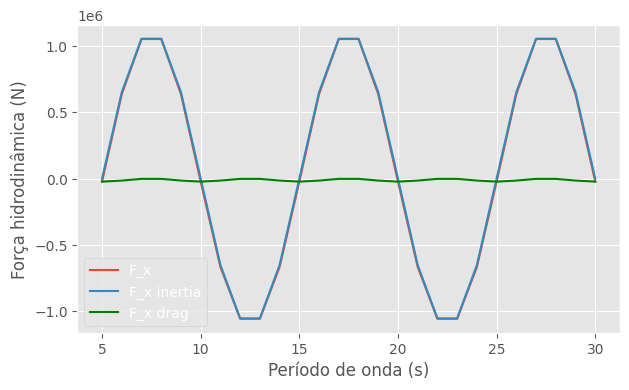

In [22]:
plt.figure(figsize=(7,4))
plt.plot(periodo, S_F_x)
plt.plot(periodo, S_F_x_in)
plt.plot(periodo, S_F_x_dr, 'g')
plt.xlabel('Período de onda (s)')
plt.ylabel('Força hidrodinâmica (N)')
plt.legend(['F_x', 'F_x inertia', 'F_x drag']);

### b) Estimativa de RAOs de Surge

Na solução do item (a), você deve ter notado que a parcela de força relacionada ao arrasto viscoso é bastante pequena comparada à parcela inercial. A razão disso são os valores relativamente baixos de KC que caracterizam o escoamento ao longo do cilindro (compare seus resultados com o mapa de domínio de forças apresentado em aula). Vamos, então, estender a aplicação da fórmula de Morison para estimar as forças e o módulo do RAO linear de surge desta estrutura para uma faixa de períodos de ondas entre 5s e 30s (é verdade que, para os períodos mais baixos, violaremos a hipótese de ondas longas, mas considere que o erro, neste caso, é aceitável). Faça um gráfico do módulo do RAO em função do período de onda. Para tanto, desconsidere a parcela viscosa da força de excitação e os efeitos relacionados ao amortecimento potencial (que, neste caso, são mesmo pequenos). Despreze também qualquer efeito tridimensional na massa adicional do cilindro (obtenha-a a partir das massas adicionais das seções horizontais) e qualquer acoplamento dinâmico que possa existir (ou seja, considere o movimento de surge como o único grau-de-liberdade do problema).

Para detalhes sobre os cálculos, consultar página 90 das Notas de aula

In [23]:
RAO_1 = []
for p in range(26):
    RAO_1.append(var_dictionary[g]/(var_dictionary[T_B]*freq[p]**2)*
                  (1-exp(-var_dictionary[T_B]*freq[p]**2/var_dictionary[g])))

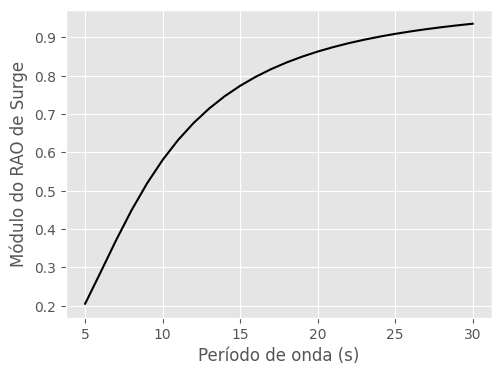

In [24]:
plt.figure(figsize=(5.5,4))
plt.plot(periodo, RAO_1, 'k')
plt.xlabel('Período de onda (s)')
plt.ylabel('Módulo do RAO de Surge');

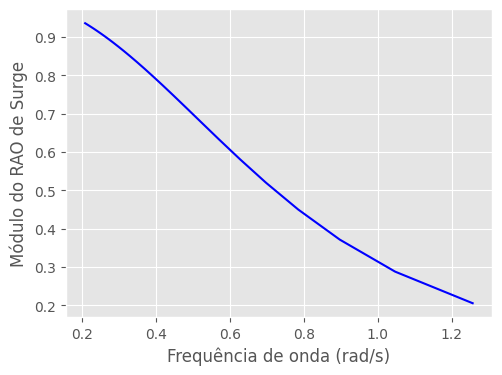

In [25]:
plt.figure(figsize=(5.5,4))
plt.plot(freq, RAO_1, 'b')
plt.xlabel('Frequência de onda (rad/s)')
plt.ylabel('Módulo do RAO de Surge');

### c) Comparação de resultados em Surge

Compare o RAO de surge obtido no item (b) com os resultados numéricos obtidos com o software WAMIT®, fornecido na planilha em anexo. Discuta a aderência dos resultados.

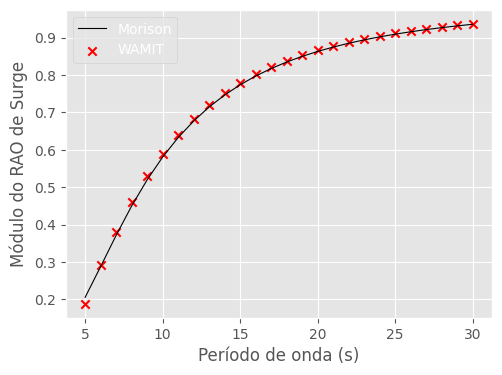

In [26]:
plt.figure(figsize=(5.5,4))
plt.plot(periodo, RAO_1, 'k', linewidth = 0.8)
plt.scatter(periodo, Surge, marker = 'x', c='red')
plt.legend(['Morison', 'WAMIT'])
plt.xlabel('Período de onda (s)')
plt.ylabel('Módulo do RAO de Surge');

In [27]:
abs(Surge - RAO_1)

array([0.0171449760497386, 0.00326334699722008, 0.00940065977716970,
       0.0100269576383304, 0.00918679014973023, 0.00813733954625884,
       0.00718825681930935, 0.00638664462930516, 0.00571245818216271,
       0.00513865166360639, 0.00464933117586053, 0.00422135280168257,
       0.00385183401205602, 0.00352114211887866, 0.00323148522494898,
       0.00297546178728691, 0.00274625558980457, 0.00254078545628023,
       0.00235356705298795, 0.00218543588004882, 0.00203977878737482,
       0.00190476080965518, 0.00178268487732891, 0.00166917119814380,
       0.00156778606049701, 0.00147448539134787], dtype=object)

R: aderência muito boa para toda a faixa de períodos considerada.

Resultados bons inclusive para ondas curtas ($T = 5s$ e $ka = 2.0$), quando os efeitos de difração já são relevantes.

Ou seja, para esta geometria, a aproximação feita no potencial de espalhamento ($\phi_7$) na solução de ondas longas ainda é razoável mesmo para comprimentos de onda que fogem desse regime.

### d) Estimativa de RAOs de Pitch

De forma análoga, levante o gráfico da amplitude de RAO de pitch deste corpo flutuante para a mesma faixa de períodos de ondas (5s a 30s). Novamente, considere o problema com apenas um grau-de-liberdade, ignorando os acoplamentos dinâmicos. Na sua opinião, nesta faixa de frequências, continua sendo razoável desprezar o amortecimento por geração de ondas para a estimativa deste RAO?

In [28]:
# Calculo dos parametros utilizados
a_55, c_55 = symbols(r'a_55, c_55')

# Valor I_55
var_dictionary[I_55] = rho*pi*D**2*T_B**3/12

var_dictionary[a_55] = rho*pi*D**2*T_B**3/12

var_dictionary[c_55] = rho*pi*D**2*g*T_B*GM_y/4

In [29]:
Chi_5 = integrate(f_x_in*z_v,(z_v,0,-T_B))
Chi_5 = Chi_5.subs(var_dictionary)

RAO_5 = []
for p in range(26):
    RAO_5.append(abs(Chi_5.subs(t, periodo[p]).evalf()) /
                  abs(var_dictionary[rho]*np.pi*var_dictionary[D]**2*var_dictionary[T_B]**3/4*
                      (-2/3*freq[p]**2+var_dictionary[g]*var_dictionary[GM_y]/(var_dictionary[T_B]**2))))

In [30]:
for j in range(26):
    print(Chi_5.subs(t, periodo[j]).evalf())

# problema no Chi_5

0
-7843821.99682221
-12691570.5925624
-12691570.5925624
-7843821.99682221
0
7843821.99682221
12691570.5925624
12691570.5925624
7843821.99682221
0
-7843821.99682221
-12691570.5925624
-12691570.5925624
-7843821.99682221
0
7843821.99682221
12691570.5925624
12691570.5925624
7843821.99682221
0
-7843821.99682221
-12691570.5925624
-12691570.5925624
-7843821.99682221
0


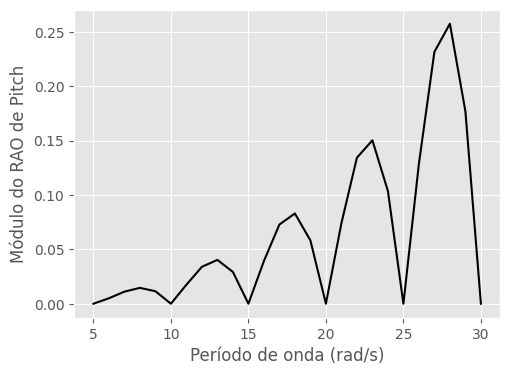

In [31]:
plt.figure(figsize=(5.5,4))
plt.plot(periodo, RAO_5, 'k')
plt.xlabel('Período de onda (rad/s)')
plt.ylabel('Módulo do RAO de Pitch');

### e) Comparação de resultados em Pitch

Compare o RAO de pitch estimado com os resultados numéricos fornecidos na planilha, e discuta a aderência dos resultados.

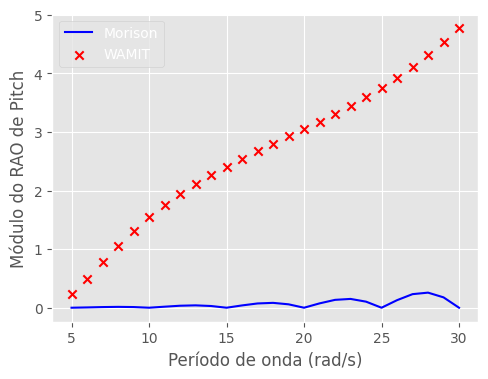

In [32]:
plt.figure(figsize=(5.5,4))
plt.plot(periodo, RAO_5, 'b')
plt.scatter(periodo, Pitch, marker = 'x', c='red')
#plt.scatter(periodo, Pitch*np.pi/180, marker = 'X', c='green')
plt.legend(['Morison', 'WAMIT'])
plt.xlabel('Período de onda (rad/s)')
plt.ylabel('Módulo do RAO de Pitch');

### f) Estimativa de RAOs de Heave

Para o movimento vertical, neste caso, não é razoável a aplicação da fórmula de Morison para integração seccional. No entanto, podemos considerar que, uma vez que as ondas sejam longas, a pressão na base do cilindro possa ser estimada pela própria pressão decorrente da onda incidente não-perturbada, ou seja, desconsiderando efeitos da perturbação causada pelo corpo no escoamento incidente. Adotando esta abordagem, levante a amplitude do RAO de heave na mesma faixa de períodos dos itens anteriores.

In [33]:
RAO_3 = []
for p in range(26):
    RAO_3.append(var_dictionary[g]*np.exp(-var_dictionary[T_B]*freq[p]**2/var_dictionary[g])/
                 abs(var_dictionary[g] - freq[p]**2*var_dictionary[T_B]))

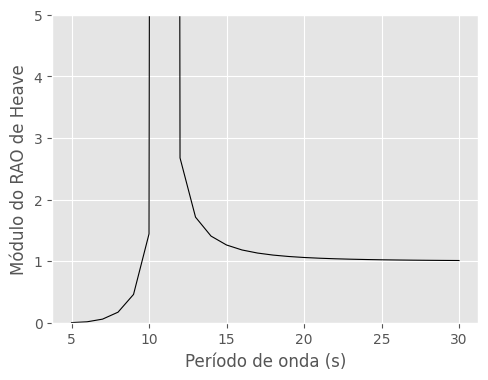

In [34]:
plt.figure(figsize=(5.5,4))
plt.plot(periodo, RAO_3, 'k', linewidth = 0.8)
plt.ylim(0, 5)
plt.xlabel('Período de onda (s)')
plt.ylabel('Módulo do RAO de Heave');

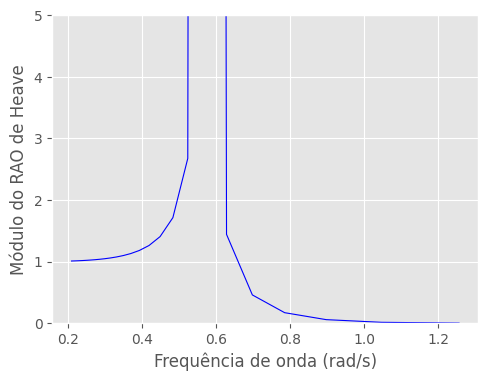

In [35]:
plt.figure(figsize=(5.5,4))
plt.plot(freq, RAO_3, 'b', linewidth = 0.8)
plt.ylim(0, 5)
plt.xlabel('Frequência de onda (rad/s)')
plt.ylabel('Módulo do RAO de Heave');

### g) Comparação de resultados em Heave

Comparando a estimativa do RAO de heave com os valores numéricos da planilha, percebe-se que há o problema da ressonância deste movimento dentro da faixa de frequências considerada. Discuta a questão da amplificação ressonante e os elevados valores obtidos. Eles devem ser representativos do movimento real da plataforma?

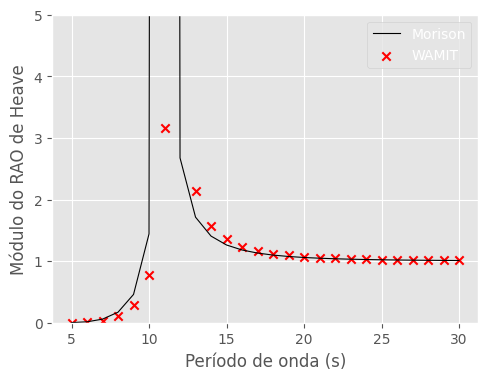

In [36]:
plt.figure(figsize=(5.5,4))
plt.plot(periodo, RAO_3, 'k', linewidth = 0.8)
plt.scatter(periodo, Heave, marker = 'x', c='red')
plt.legend(['Morison', 'WAMIT'])
plt.ylim(0, 5)
plt.xlabel('Período de onda (s)')
plt.ylabel('Módulo do RAO de Heave');

### h) Espectros de resposta

Suponha, agora, que esta estrutura é sujeita a uma condição de mar unidirecional e que se propaga no sentido $x+$ ($\beta=0^{\circ}$) cujo espectro de energia seja descrito pelo modelo de JONSWAP, com altura significativa $H_{1/3} = 4.0$ m, período de pico $T_p=10$ s e fator de pico $\gamma=3.3$. Empregando os RAOs estimados nos itens (b) e (d), levante os espectros de resposta dos movimentos de _surge_ e _pitch_ da plataforma.

In [37]:
def jonswap(w):
    H_s = 4; T_p = 10; gamma = 3.3
    w_p = 2*np.pi/T_p

    if w < w_p:
        mu = 0.07
    else:
        mu = 0.09

    A = np.exp(-((w/w_p-1)/(mu*np.sqrt(2)))**2)

    S_zeta = (320*H_s**2)/(T_p**4*w**5) * np.exp(-1950/(T_p**4*w**4)) * gamma**A

    return S_zeta

omega = np.linspace(10**(-8),2,26)
JS = []
for elem in omega:
    JS.append(jonswap(elem))
JS = np.array(JS)

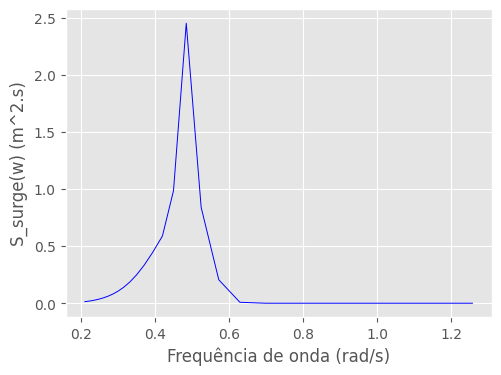

In [38]:
RAO_1 = np.array(RAO_1)
S_surge = JS*RAO_1**2
S_surge

plt.figure(figsize=(5.5,4))
plt.plot(freq, S_surge, 'b', linewidth=0.7)
plt.xlabel('Frequência de onda (rad/s)')
plt.ylabel('S_surge(w) (m^2.s)');

### i) Amplitudes e períodos

Calcule, agora, as amplitudes significativas de movimento e os períodos entre zeros ascendentes dos movimentos de _surge_ e _pitch_, previstos para esta condição de mar.

In [39]:
a0 = 1.4823*0.5077094277356182


def f(A):
    return A**2/(0.5077094277356182**2)*np.exp(-(A**2)/(2*0.5077094277356182**2))

A_s = quad(f, a0, np.inf)
print('H_s =', A_s[0]*2)

H_s = 0.6776769509144525


In [40]:
S_surge

array([0, 0, 4.03139784102017e-127, 3.87841456683558e-24,
       3.45742229536020e-7, 0.00829225930804815, 0.205065934662047,
       0.838612878755602, 2.45078220528281, 0.983929312739290,
       0.588294461206866, 0.445540180000614, 0.333492461010021,
       0.248258534777899, 0.185422516575950, 0.139552429548212,
       0.106044678078763, 0.0814217654103077, 0.0631729019027683,
       0.0495163319972453, 0.0391928268704453, 0.0313100879999024,
       0.0252318874840135, 0.0205009036248764, 0.0167854463554469,
       0.0138426870909211], dtype=object)

In [41]:
a000 = [0, 0, 4.03139784102017e-127, 3.87841456683558e-24,
       3.45742229536020e-7, 0.00829225930804815, 0.205065934662047,
       0.838612878755602, 2.45078220528281, 0.983929312739290,
       0.588294461206866, 0.445540180000614, 0.333492461010021,
       0.248258534777899, 0.185422516575950, 0.139552429548212,
       0.106044678078763, 0.0814217654103077, 0.0631729019027683,
       0.0495163319972453, 0.0391928268704453, 0.0313100879999024,
       0.0252318874840135, 0.0205009036248764, 0.0167854463554469,
       0.0138426870909211]

np.std(a000)

np.float64(0.5077094277356182)